# 📊 Data Visualization and Exploratory Data Analysis (EDA)

In [1]:
# What is it? It is nothing but getting insight about the dataset you are working with.

In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# The matplotlib.pyplot module contains functions that allow you to generate many kinds of plots quickly.

In [3]:
#Load the dataset in housing dataframe
housing = pd.read_csv('housing_data.csv')

In [4]:
#see what's in the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#to check the cardinality of categorical data corresponding to "Ocean Proximity"
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

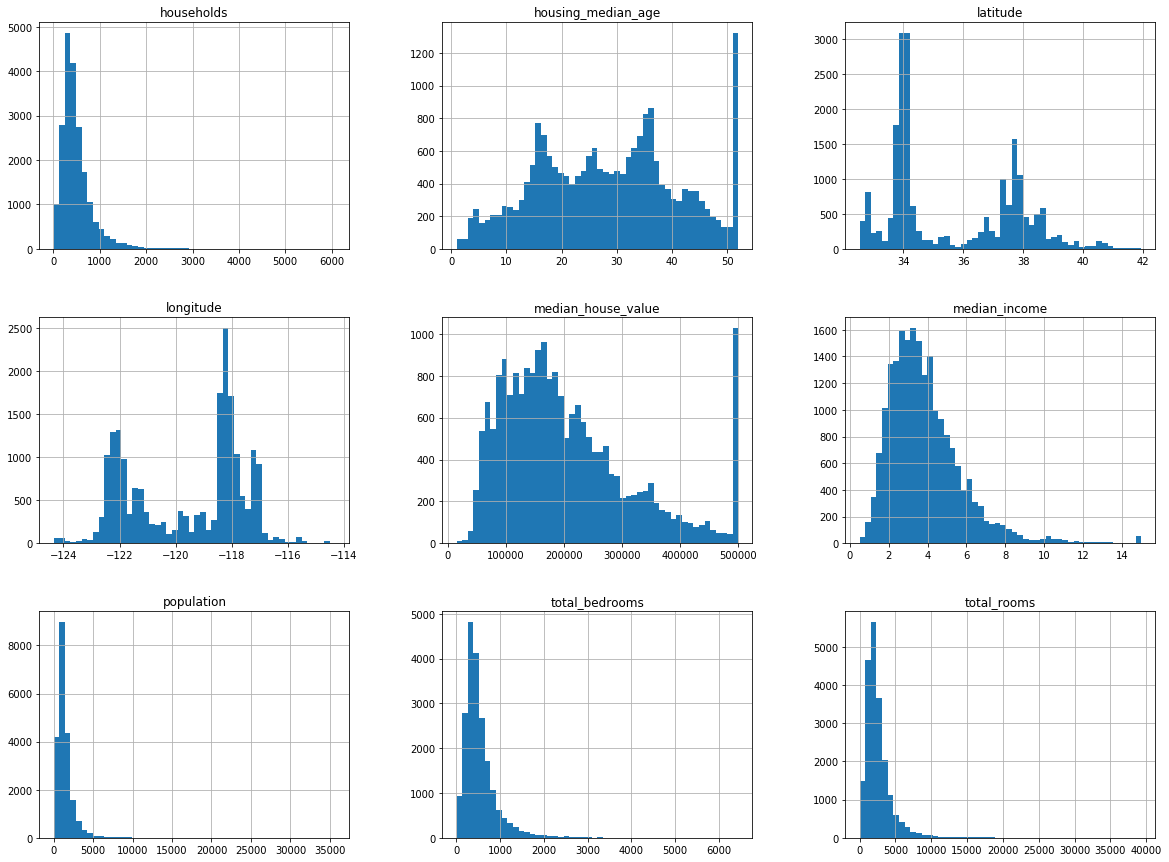

In [7]:
#plot all features to see how data is distributed

%matplotlib inline 
# the above is a magic function (only to be used in Jupyter NB). When using the 'inline' 
# backend, your matplotlib graphs will be included in your notebook, next to the code.

housing.hist(bins=50, figsize=(20,15))
plt.show()

#Note that calling show() is optional in a Jupyter notebook, 
#as Jupyter will automatically display plots when a cell is executed.

🌶️🌶️<b>NOTE:</b>  <br>
Many histograms are 'tail heavy' : they extend much farther to one side of the median than to the other. 
This may make it a bit harder for some Machine Learning algorithms to detect patterns. 
So looking at this piece of info we try transforming these attributes later on to have more bell-shaped distributions.


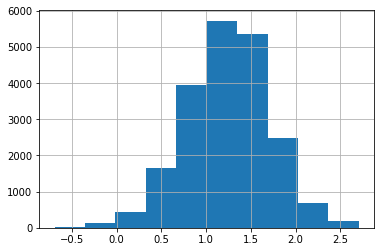

In [8]:
#To overcome tail-heaviness / skewed data
housing['median_income'].apply(np.log).hist()
plt.show()

### 🧠Understanding BoxPlots 

In [9]:
import seaborn as sns #Seaborn is a statistical data Python visualization library based on matplotlib.
# PLEASE INSTALL SEABORN BEFORE USING/IMPORTING IT
sns.set(rc={'figure.figsize':(12,9)})

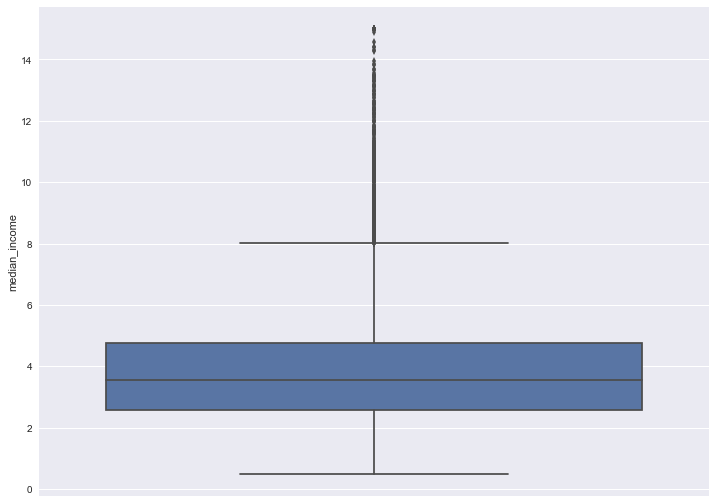

In [10]:
sns.boxplot(y='median_income', data = housing)

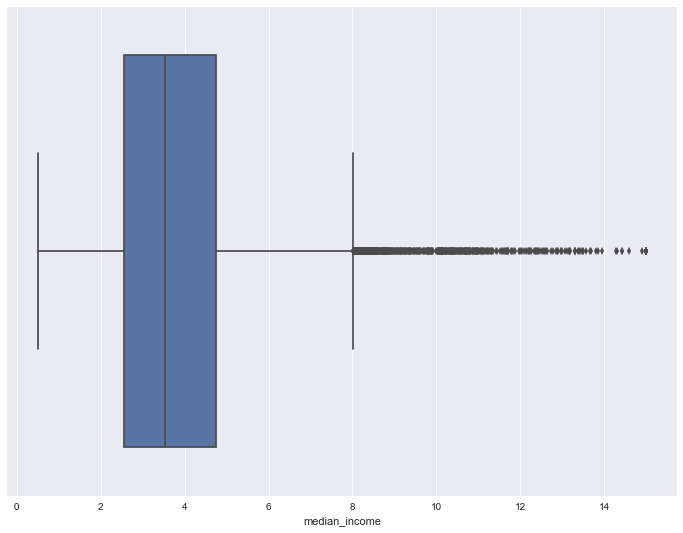

In [11]:
sns.boxplot(x='median_income', data = housing)

In [12]:
#What does this boxplot depict?
#What are quartiles?
#Median of above plot?
#What are whiskers?
#What are outliers?

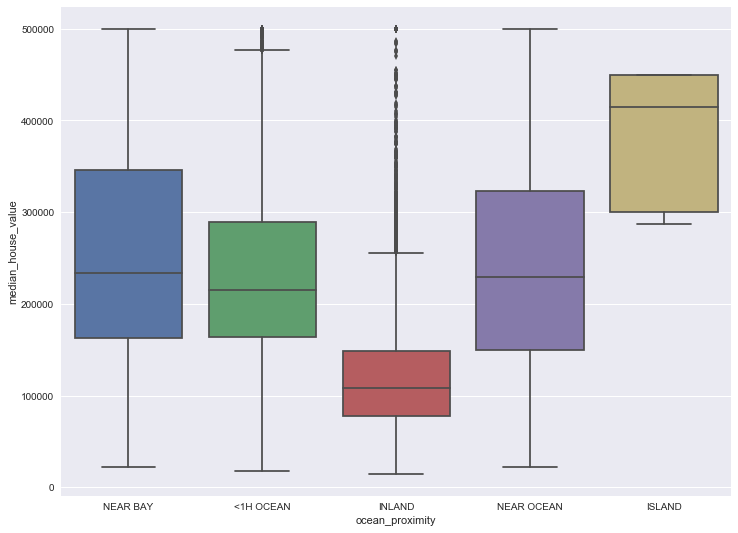

In [13]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data = housing)

In [14]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
# Let’s create a copy so you can play with it without harming the training set
housing = train_set.copy()

# Visulizations and using MatplotLib

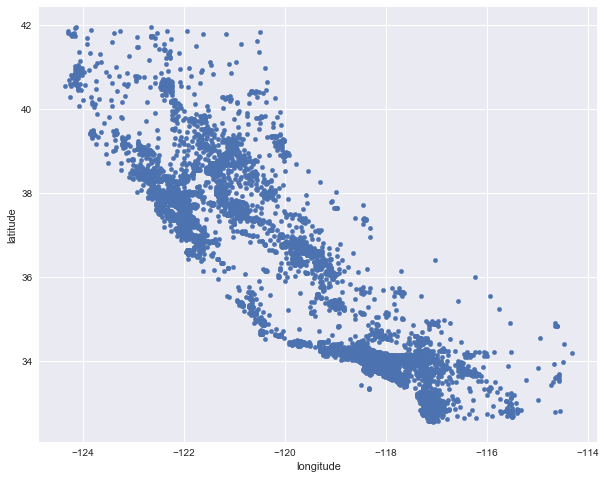

In [16]:
# Since there is geographical information (latitude and longitude), it is a 
# good idea to create a scatterplot of all districts to visualize the data

housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,8))
# plt.show()

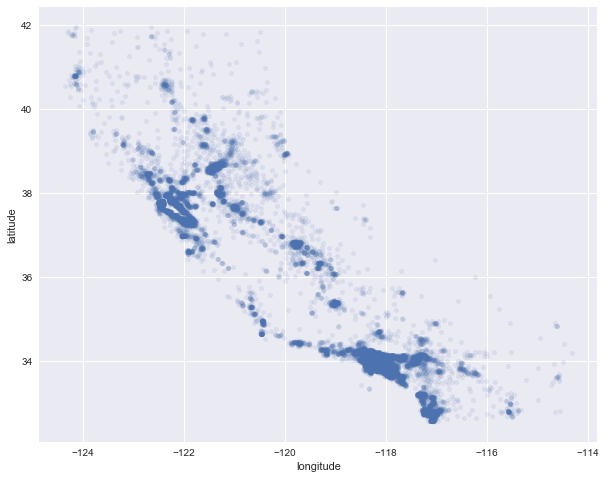

In [17]:
#Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10,8))

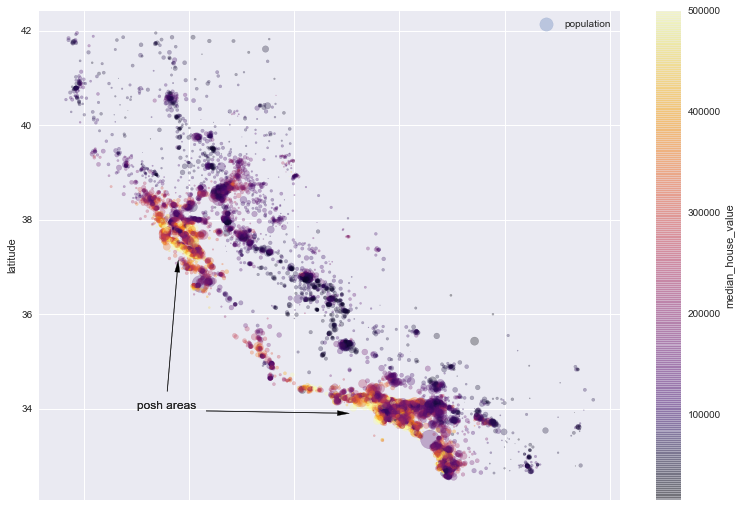

In [18]:
# Our brains are very good at spotting patterns on pictures, but you may need to play around 
# with visualization parameters to make the patterns stand out.
# size of plot points
fig = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, s=housing["population"]/100, 
                   figsize=(13,9), label="population",c="median_house_value", cmap=plt.get_cmap("inferno"), 
                   colorbar=True,) 


# annotating a plot
plt.annotate('posh areas', xy=(-122.2, 37.3), xytext=(-123,34),arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5),)
plt.annotate('posh areas', xy=(-118.8,33.9), xytext=(-123,34),arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5),)

plt.legend()
plt.show()

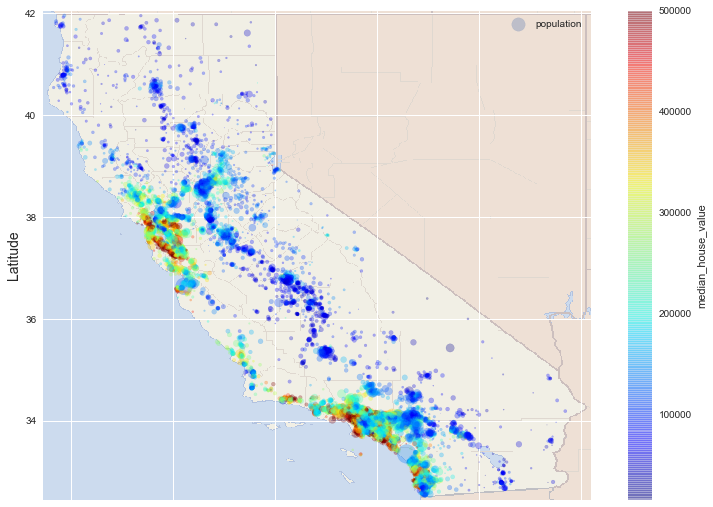

In [19]:
# plotting the above plot on a map

california_img = mpimg.imread('california.png') #importing map

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, s=housing['population']/100, 
             label='population', figsize=(13,9),c='median_house_value', cmap=plt.get_cmap('jet'), 
             colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.4)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()


### <span title="Spicy" style="color: coral">🌶️🌶️</span>Note :  

<ol>
<li>The above plot tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already.</li>
<br>
<li>It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers.</li>
<br>
<li>The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.</li>
</ol>

# Studying Correlations

In [20]:
corr_matrix = housing.corr() # corr() : Pandas method, computes pairwise correlation of columns, excluding NA/null values
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [21]:
#similarly you can also do

corr_matrix["total_rooms"].sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.930489
households            0.920482
population            0.857936
median_income         0.198268
median_house_value    0.133989
longitude             0.038676
latitude             -0.029224
housing_median_age   -0.360922
Name: total_rooms, dtype: float64

### <span title="Spicy" style="color: coral">🌶️🌶️</span> NOTE : 
<ul>
<li>The correlation coefficient ranges from –1 to 1.</li><br>
<li>When it is close to 1, it means that there is a strong positive 'LINEAR' correlation <br>i.e. the correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). <br>It may completely miss out on nonlinear relationships.</li>
</ul>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000093037F0>,
      dtype=object)

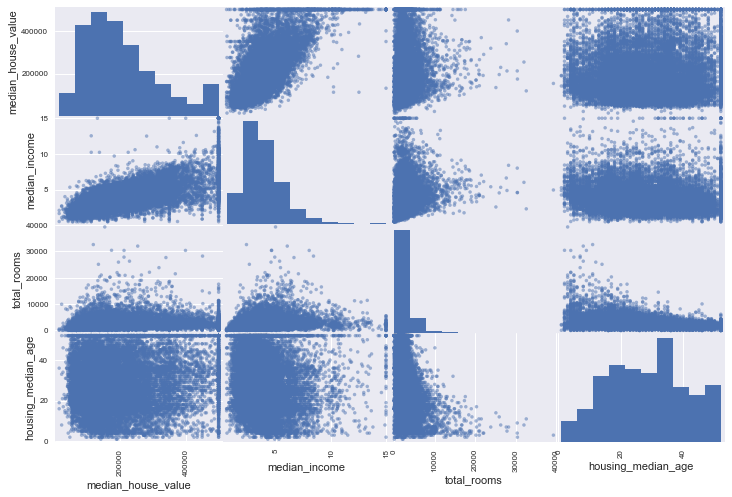

In [22]:
# Using Pandas scatter_matrix function to find correlation,which plots 
# every numerical attribute against every other numerical attribute

"""
Since there are now 9 numerical attributes, you would get 9*9 = 81 plots, which would not fit on a page, 
so let’s just focus on a few promising attributes that seem most correlated with the median housing value
"""

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [23]:
# The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted each variable 
# against itself, which would not be very useful. So instead Pandas displays a histogram of each attribute

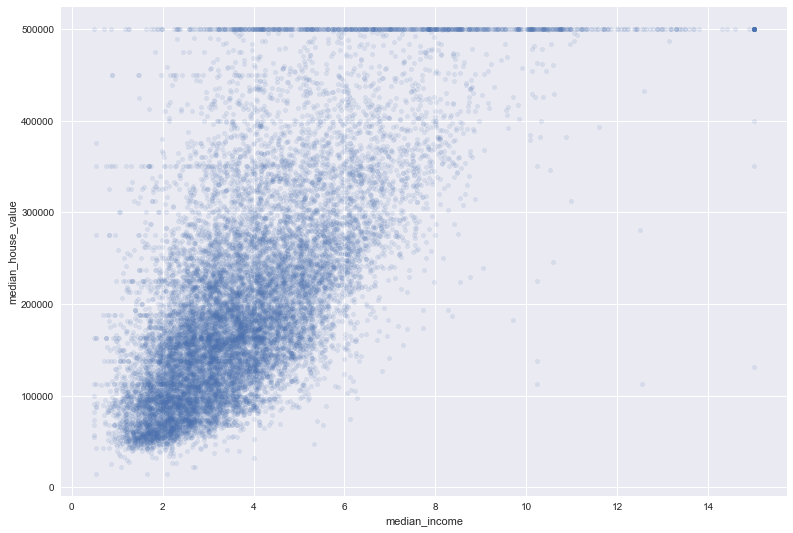

In [24]:
# The most promising attribute to predict the median house value (using correlation matrix as reference)
# is the median income, so let’s zoom in on their correlation scatterplot.

housing.plot(kind ='scatter', x='median_income', y='median_house_value', alpha=0.12, figsize=(13,9))

#### 🌟  Revelations from plot above  🌟
1. The correlation is indeed very strong as the upward trend and the points are not too dispersed
2. the price cap at $500,000 is visible via a horizontal line
3. But this plot reveals other less obvious straight lines: few more Which are they?

You may want to try removing the corresponding districts to prevent your algorithms from learning 
to reproduce these data idiosyncrasies

# 💪 Excercises  

Read the countries.csv data into your python notebook <br>
Q1. a) Compare the absolute population growth in US and India using matplotlib.pyplot ('Show' comparison using simple line plots)<br>
Q1. b) Now compare the population growth in the point 2 in terms of percentage (HINT: divide the population of both countries by their population in 1952 respectively and then simply plot the graphs)


## ✏️📖 References, Extra Readings and Practice: 

A compact Data viz. course : https://www.kaggle.com/learn/data-visualisation <br>
Titanic Dataset EDA (Beast Mode) : https://www.kaggle.com/ash316/eda-to-prediction-dietanic <br>
Normal Distribution : https://www.youtube.com/watch?v=hgtMWR3TFnY <br>
Box Plots : https://seaborn.pydata.org/generated/seaborn.boxplot.html <br>
Hands on ML Book : http://download1.libgen.io/ads.php?md5=961B87D8FA149D92D0D3F04837EF011E (click on GET to download)